In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

seed = 0
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
%reload_ext autoreload
%autoreload 2

from src.constants import csv_file, directory, INPUT_SHAPE, YEAR, ext

from src.utils import (
    get_dataloader,
    split_val,
    plot_confusion_matrix, 
    calculate_confusion_binary, 
    calculate_confusion_matrix,
)

from src.model import Model_Retinopathy
from src.server_scaffold import Server_Scaffold
from src.server_fedavg import Server_FedAVG

from src.constants import EPOCHS, BATCH_SIZE, LEARNING_RATE, UPDATES
from src.constants import K_CLIENTS, C, rounds, clients
from src.constants import optimizer_fn, plot_title

In [4]:
# DATA STUFF
df = pd.read_csv(csv_file)
df, test_df = split_val(df, 0.15)
df, val_df = split_val(df, 0.118)

print(len(df), len(val_df), len(test_df))

_, val_loader = get_dataloader(val_df, ext, directory, BATCH_SIZE)
_, test_loader = get_dataloader(test_df, ext, directory, BATCH_SIZE)

2745 367 550


In [5]:
# server_fedavg = Server_FedAVG(K_CLIENTS, optimizer_fn, df, val_loader)

In [6]:
""" server_fedavg.train_loop(rounds, EPOCHS)
file_path = f"{plot_title}/FedAvg_results.txt"
with open(file_path, "a") as f:
    print("TESTING: ", server_fedavg.validate(test_loader), file=f)
    print("\n", file=f)
    for i, client in enumerate(server_fedavg.clients_ind):
        val = client.validate(test_loader)
        print(f"Client test {i}: {val}", file=f) """

' server_fedavg.train_loop(rounds, EPOCHS)\nfile_path = f"{plot_title}/FedAvg_results.txt"\nwith open(file_path, "a") as f:\n    print("TESTING: ", server_fedavg.validate(test_loader), file=f)\n    print("\n", file=f)\n    for i, client in enumerate(server_fedavg.clients_ind):\n        val = client.validate(test_loader)\n        print(f"Client test {i}: {val}", file=f) '

In [7]:
gpu_memory = torch.cuda.memory_allocated()
print(gpu_memory / (1024**2), "MB")
server_scaffold = Server_Scaffold(K_CLIENTS, optimizer_fn, df, val_loader)
print((torch.cuda.memory_allocated() - gpu_memory) / (1024**2), "MB")

0.0 MB
2672.71142578125 MB


In [8]:
server_scaffold.train_loop(rounds, EPOCHS)
file_path = f"{plot_title}/SCAFFOLD_results.txt"
with open(file_path, "a") as f:
    print("TESTING: ", server_scaffold.validate(test_loader), file=f)
    print("\n", file=f)
    for i, client in enumerate(server_scaffold.clients_ind):
        val = client.validate(test_loader)
        print(f"Client {i} tested")
        print(f"Client test {i}: {val}", file=f)

GLOBAL: {'loss': 1.9779, 'accuracy': 0.1008, 'f1': 0.6727, 'accuracy_binary': 0.5068, 'recall': 1.0, 'precision': 0.5068}
2680.83642578125 MB
Round 0
--------------------------------------------------
2680.83642578125 MB
Client 0:
2680.83642578125 MB
Epoch 0: {'loss': 1.7584, 'accuracy': 0.1008, 'f1': 0.6727, 'accuracy_binary': 0.5068, 'recall': 1.0, 'precision': 0.5068}
2734.083984375 MB
Epoch 1: {'loss': 1.6092, 'accuracy': 0.1499, 'f1': 0.6703, 'accuracy_binary': 0.5068, 'recall': 0.9892, 'precision': 0.5069}
2734.373046875 MB
Epoch 2: {'loss': 1.522, 'accuracy': 0.3569, 'f1': 0.6456, 'accuracy_binary': 0.5722, 'recall': 0.7688, 'precision': 0.5564}
2734.994140625 MB
Epoch 3: {'loss': 1.4601, 'accuracy': 0.4659, 'f1': 0.53, 'accuracy_binary': 0.594, 'recall': 0.4516, 'precision': 0.6412}
2734.431640625 MB
Epoch 4: {'loss': 1.4058, 'accuracy': 0.5177, 'f1': 0.3887, 'accuracy_binary': 0.5886, 'recall': 0.2581, 'precision': 0.7869}
2690.46142578125 MB
Client 1:
2690.46142578125 MB
Epoc

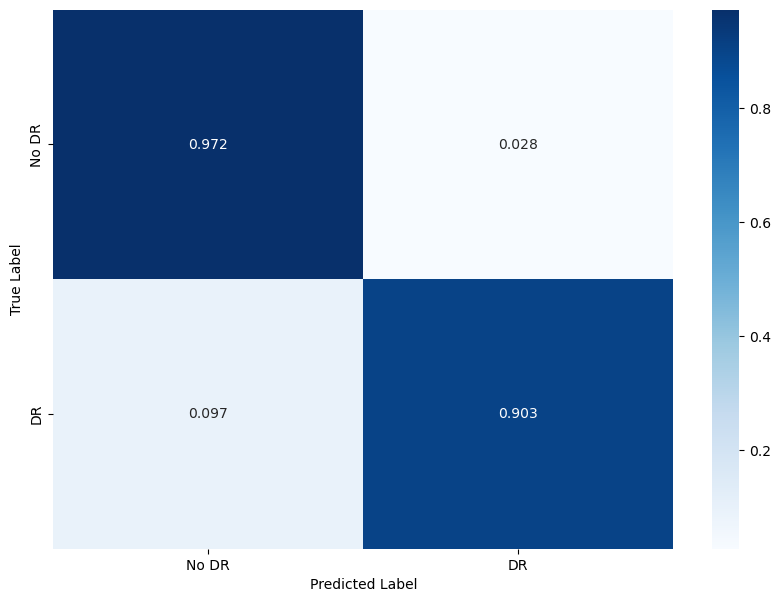

In [ ]:
cmb = calculate_confusion_binary(server_scaffold.model, val_loader)
plot_confusion_matrix(cmb, ["No DR", "DR"])

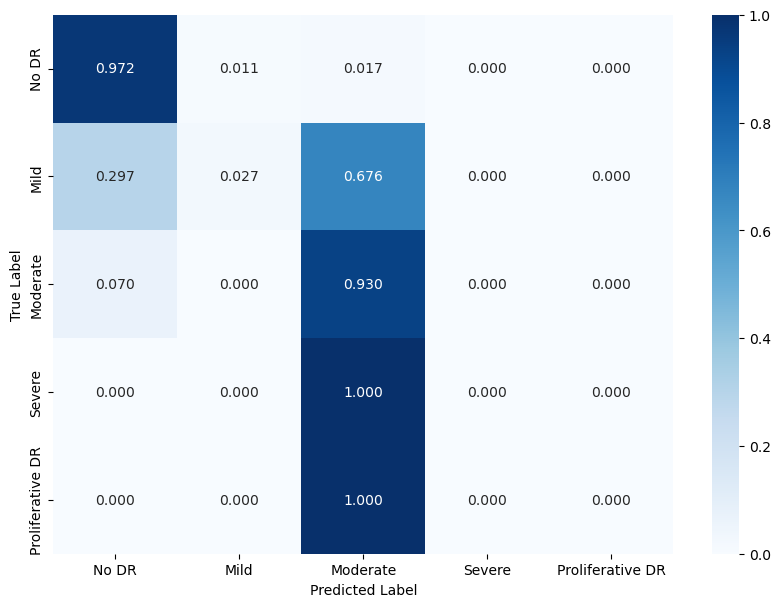

In [ ]:
cm = calculate_confusion_matrix(server_scaffold.model, val_loader)
plot_confusion_matrix(cm, ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"])